## Predict Delivery Time from Sorting Time 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf

### Understanding the Data

In [4]:
time = pd.read_csv('delivery_time.csv')

In [5]:
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# no missing values, data types are correct

In [7]:
time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

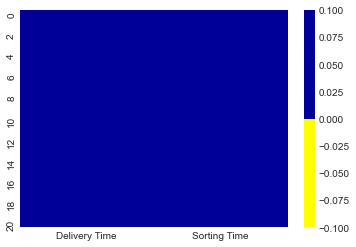

In [8]:
colors=['#ffff00','#000099']
sns.heatmap(time.isnull(),cmap=sns.color_palette(colors))

In [9]:
# Rename the columns

df = time.rename({'Delivery Time': 'DeliveryTime','Sorting Time':'SortingTime'},axis = 1)
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
# no duplicates present

Text(0.5, 1.0, 'Outliers checking for Delivery Time')

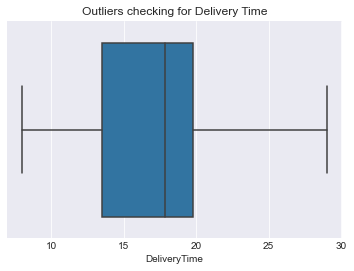

In [11]:
# now we will check the outliers in the data

sns.boxplot(df['DeliveryTime'])
plt.title('Outliers checking for Delivery Time')

In [ ]:
# no outlier in 'Delivery Time'

Text(0.5, 1.0, 'Outliers checking for Sorting Time')

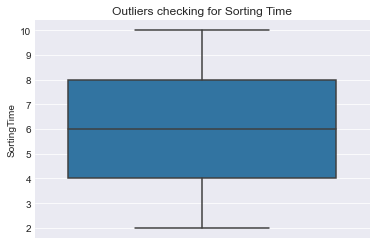

In [12]:
sns.boxplot(y=df['SortingTime'])
plt.title('Outliers checking for Sorting Time')

## Creating a Simple Linear Model
    * Check Linearity
    * Built Model
    * Check Fitness of model

### Step 1: Understanding the Linearity 

In [13]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:>

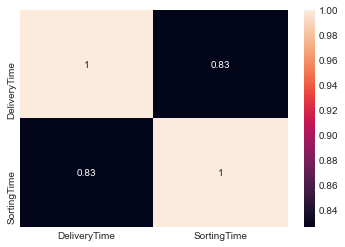

In [14]:
sns.heatmap(df.corr(),annot=True)

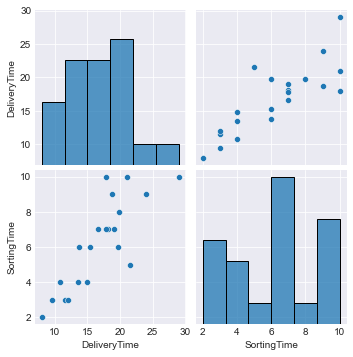

In [15]:
sns.pairplot(df)

Text(0.5, 1.0, 'Predicting Delivery Time from Sorting TIme')

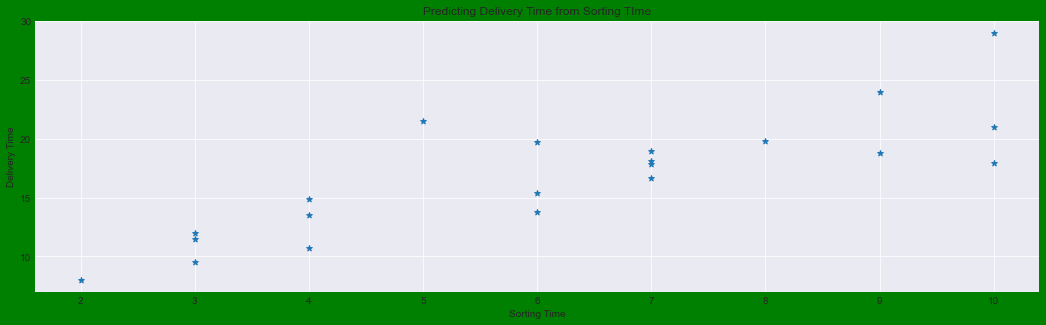

In [16]:
# Ploting Scatter Plot - individual

plt.figure(figsize=(18,5),facecolor='g')
plt.scatter(df['SortingTime'],df['DeliveryTime'],marker='*')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Predicting Delivery Time from Sorting TIme')

In [ ]:
# they are colinear in Nature

In [17]:
# Creating / Building Model 

time_model = smf.ols('DeliveryTime~SortingTime',data=df).fit()

In [18]:
time_model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [19]:
time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        18:15:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Improving the R2 : Better Model

In [20]:
df1 = df

df1['DeliveryTime'] = np.log(df['DeliveryTime'])
df1['SortingTime'] = np.log(df['SortingTime'])

time_model1 = smf.ols('DeliveryTime~SortingTime',data=df1).fit()
time_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.60e-07
Time:                        18:15:37   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df2 = df1

df2['DeliveryTime'] = np.log(df1['DeliveryTime'])
df2['SortingTime'] = np.log(df1['SortingTime'])

time_model2 = smf.ols('DeliveryTime~SortingTime',data=df2).fit()
time_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           4.05e-08
Time:                        18:15:38   Log-Likelihood:                 32.435
No. Observations:                  21   AIC:                            -60.87
Df Residuals:                      19   BIC:                            -58.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8447      0.023     37.344      0.000       0.797       0.892
SortingTime     0.3357      0.038      8.787      0.000       0.256       0.416
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.359
Skew:                           0.284   Prob(JB):                        0.836
Kurtosis:                       2.706   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

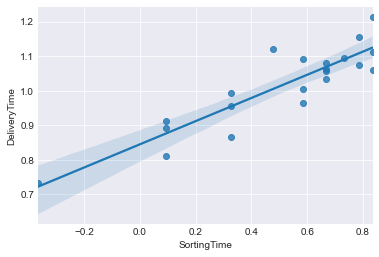

In [22]:
sns.regplot(x=df2['SortingTime'],y=df2['DeliveryTime'],fit_reg=True)